In [71]:
## load the libraries 
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from numpy import argmax, array_equal
import matplotlib.pyplot as plt
from keras.models import Model
#from imgaug import augmenters
from random import randint
import pandas as pd
import numpy as np
import os
import gzip
%matplotlib inline
from keras.models import Model
from keras.optimizers import RMSprop
from keras.layers import Input,Dense,Flatten,Dropout,merge,Reshape,Conv2D,MaxPooling2D,UpSampling2D,Conv2DTranspose
from keras.layers.normalization import BatchNormalization
from keras.models import Model,Sequential
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adadelta, RMSprop,SGD,Adam
from keras import regularizers
from keras import backend as K
from keras.utils import to_categorical

In [72]:
import random
from scipy.stats import multivariate_normal
n = 100
mean = [0]*100
cov = [[1]*n]*n


In [75]:
x = np.random.multivariate_normal(mean, cov, 100000)
x

array([[-0.35807854, -0.35807829, -0.35807868, ..., -0.35807855,
        -0.35807844, -0.35807827],
       [ 0.75383263,  0.7538327 ,  0.75383272, ...,  0.75383261,
         0.75383271,  0.75383269],
       [-1.76539609, -1.76539618, -1.76539631, ..., -1.76539606,
        -1.76539621, -1.76539605],
       ...,
       [-2.18103246, -2.18103252, -2.18103247, ..., -2.1810326 ,
        -2.18103256, -2.18103252],
       [ 0.3997802 ,  0.39978026,  0.39978033, ...,  0.39978011,
         0.39978004,  0.39978009],
       [ 0.17287237,  0.17287245,  0.17287251, ...,  0.17287232,
         0.17287247,  0.17287249]])

In [76]:
x.shape

(100000, 100)

In [77]:
beta = np.random.uniform(-1,1,11)

In [78]:
beta

array([-0.54815977,  0.36034504,  0.77198464,  0.87510479,  0.05171985,
       -0.52459533,  0.88239635,  0.0109008 ,  0.18528098,  0.92400877,
        0.47678366])

In [79]:
for p in range(1,11):
  for i in range(0,100000):
    mu_y = beta[0] + np.cumsum(beta[p]*x[i][p])
    print(mu_y)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[-0.01643554]
[-0.3351536]
[-0.25929544]
[-0.42593963]
[-0.44294144]
[0.04732959]
[-0.37226814]
[-0.77868915]
[-1.1560797]
[-0.24981728]
[-1.46242224]
[-0.32317402]
[-0.14604294]
[-0.769676]
[-0.61379193]
[-0.21969385]
[-1.32530535]
[-1.0143099]
[-0.67000834]
[-0.20788692]
[-1.02757201]
[-0.27267728]
[-1.37421962]
[-0.24129781]
[-1.10463061]
[-0.48055179]
[0.07758434]
[-0.60429969]
[0.61380132]
[-0.66072041]
[-0.12408643]
[-1.36673053]
[-1.19941207]
[0.04144972]
[-0.25472492]
[-0.21307571]
[-0.6775691]
[-0.04834714]
[0.12580204]
[-1.89706478]
[-0.21417817]
[-0.64210439]
[-0.2358957]
[0.01688415]
[-0.37374824]
[-1.1210903]
[-0.94823766]
[-1.10056583]
[-0.76950179]
[0.04676829]
[-0.83274894]
[-1.70524559]
[-0.30010763]
[-0.77930006]
[-0.27190118]
[0.03766477]
[0.05135967]
[-0.45223982]
[0.74663703]
[-0.26593892]
[-0.81091735]
[-0.44199568]
[-0.19607724]
[-1.06266646]
[-0.81445148]
[-1.11830304]
[-0.1351347]
[-0.12678913]
[-0.56094436]
[-1.07981335]
[-0

In [80]:
from scipy.stats import norm 
y = np.random.normal(mu_y, 1, 100000)

In [81]:
y.shape

(100000,)

In [82]:
 X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

 X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

In [83]:
X_train = X_train.astype("float32") / 255.0
X_val = X_val.astype("float32") / 255.0
X_train = X_train.reshape(-1, 10, 10, 1)
X_val = X_val.reshape(-1, 10, 10, 1)
#y_train = y_train.reshape(6000,)
#y_train = y_train.astype("float32") / 255.0
#y_val = y_val.astype("float32") / 255.0
#y_train = y_train.reshape(-1, 10, 10, 1)
#y_val = y_val.reshape(-1, 10, 10, 1)

In [84]:
y

array([-1.30277283,  0.3736094 ,  0.01174551, ..., -0.72390171,
       -1.08075236,  0.42211858])

In [85]:
X_train.shape, X_val.shape, y_train.shape

((60000, 10, 10, 1), (20000, 10, 10, 1), (60000,))

In [106]:
X_val

array([[[[-0.00329125],
         [-0.00329125],
         [-0.00329125],
         ...,
         [-0.00329125],
         [-0.00329125],
         [-0.00329125]],

        [[-0.00329125],
         [-0.00329125],
         [-0.00329125],
         ...,
         [-0.00329125],
         [-0.00329125],
         [-0.00329125]],

        [[-0.00329125],
         [-0.00329125],
         [-0.00329125],
         ...,
         [-0.00329125],
         [-0.00329125],
         [-0.00329125]],

        ...,

        [[-0.00329125],
         [-0.00329125],
         [-0.00329125],
         ...,
         [-0.00329125],
         [-0.00329125],
         [-0.00329125]],

        [[-0.00329125],
         [-0.00329125],
         [-0.00329125],
         ...,
         [-0.00329125],
         [-0.00329125],
         [-0.00329125]],

        [[-0.00329125],
         [-0.00329125],
         [-0.00329125],
         ...,
         [-0.00329125],
         [-0.00329125],
         [-0.00329125]]],


       [[[ 0.00570437],


In [86]:
encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[10,10]),
    keras.layers.Dense(20, activation="selu"),
    keras.layers.Dense(10, activation="selu"),
])

decoder = keras.models.Sequential([
    keras.layers.Dense(20, activation="selu", input_shape=[10]),
    keras.layers.Dense(10*10, activation="sigmoid"),
    keras.layers.Reshape([10,10])
])

autoencoder = keras.models.Sequential([encoder, decoder])
autoencoder.compile(loss="binary_crossentropy",
                   optimizer=keras.optimizers.SGD(lr=1.5))

history = autoencoder.fit(X_train, X_train, epochs=10,
                         validation_data=(X_val, X_val))

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0246 - val_loss: -3.9427e-05
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: -2.4978e-04 - val_loss: -5.4806e-04
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: -0.0023 - val_loss: 1.1417e-04
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: -0.0049 - val_loss: -0.0111
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: -0.0099 - val_loss: -0.0114
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: -0.0112 - val_loss: -0.0115
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: -0.0095 - val_loss: 1.2639e-04
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: -5.8031e-04 - val_loss: 1.2639e-04
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: -5.4257e-04 - val_loss: 1.2639e-04
Epoch 10/10
1875/1875 [==========

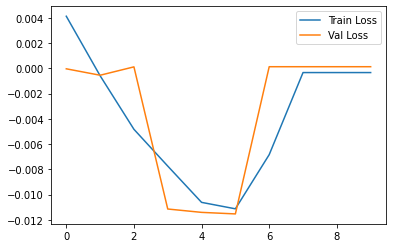

In [87]:
plt.plot(history.history["loss"], label = "Train Loss")
plt.plot(history.history["val_loss"], label = "Val Loss")
plt.legend()
plt.show()

In [120]:
val_x_compressed = encoder.predict(X_val)
tsne = TSNE()
val_x_2D = tsne.fit_transform(val_x_compressed)

In [89]:
val_x_2D

array([[ 68.49608 , -42.922554],
       [-55.882515,  42.385353],
       [ 49.431606, -77.415344],
       ...,
       [-43.11677 , -29.257875],
       [-77.03036 ,  27.18035 ],
       [ 35.230305,  69.33516 ]], dtype=float32)

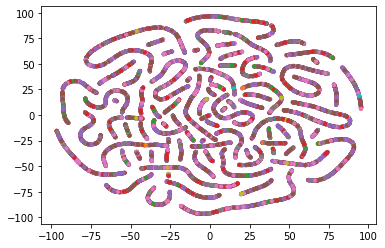

In [173]:
plt.scatter(val_x_2D[:, 0], val_x_2D[:, 1], c=y_val, s=10, cmap="tab10")

In [188]:
val_x_2D = np.array(val_x_2D)
X_val = np.array(X_val)


In [189]:
val_x_ae = np.array(val_x_compressed)

In [191]:
val_x_2D

array([[[[-63.99794 ,  52.272346],
         [-63.369343, -11.758045],
         [ 85.90257 , -44.022346],
         ...,
         [-36.09724 , -72.54821 ],
         [-25.235891, -79.2888  ],
         [ 39.159702,  80.29549 ]]]], dtype=float32)

In [192]:
ae_X_val = X_val.reshape(-1,)
ae_X_val.shape

(2000000,)

In [193]:
ae_X_new = val_x_ae.reshape(-1,)
ae_X_new.shape

(200000,)

In [ ]:
val_x_2D=np.array(val_x_2D)

In [ ]:
plt.scatter()

In [ ]:
#-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------#

# 2. **VAE**

In [90]:
import tensorflow as tf
import keras
from keras.layers import Layer, Dense, Input, Conv2D, Conv2DTranspose, Reshape, MaxPooling2D, UpSampling2D , Flatten ,BatchNormalization , Dropout, LeakyReLU, Activation, Lambda
from keras.optimizers import RMSprop ,Adam
from random import randint
import pandas as pd
from keras import metrics, backend as K
import tensorflow.keras as kr
from keras.layers import Input, Dense
from keras.models import Model

In [91]:
X_train, X_test = X_train.reshape([-1, 10, 10, 1]), X_test.reshape([-1, 10, 10, 1])
X_train = X_train.astype(np.float32, copy=False)
X_test = X_test.astype(np.float32, copy=False)

In [92]:
X_train.shape, X_val.shape

((60000, 10, 10, 1), (20000, 10, 10, 1))

In [107]:
K=keras.backend

class Sampling(keras.layers.Layer):
  def call(self, inputs):
    mean_z, log_var = inputs
    return K.random_normal(tf.shape(log_var))*K.exp(log_var/2) + mean_z

In [108]:
codings_size =10

inputs = keras.layers.Input(shape=[10,10])
z = keras.layers.Flatten()(inputs)
z = keras.layers.Dense(20, activation="selu")(z)
z = keras.layers.Dense(10, activation="selu")(z)
codings_mean = keras.layers.Dense(codings_size)(z)
codings_log_var = keras.layers.Dense(codings_size)(z)
codings = Sampling()([codings_mean, codings_log_var])
variational_encoder = keras.Model(
    inputs=[inputs], outputs=[codings_mean, codings_log_var, codings])

In [109]:
decoder_inputs = keras.layers.Input(shape=[codings_size])
x = keras.layers.Dense(10, activation="selu")(decoder_inputs)
x = keras.layers.Dense(20, activation="selu")(x)
x = keras.layers.Dense(10*10, activation = "sigmoid")(x)
outputs = keras.layers.Reshape([10*10])(x)
variational_decoder = keras.Model(inputs= [decoder_inputs], outputs=[outputs])

In [110]:
_, _, codings = variational_encoder(inputs)
reconstructions = variational_decoder(codings)
variational_ae = keras.Model(inputs=[inputs], outputs=[reconstructions])

In [111]:
latent_loss = -0.5*K.sum(
    1 + codings_log_var - K.exp(codings_log_var) - K.square(codings_mean),
    axis=-1)
variational_ae.add_loss(K.mean(latent_loss) / 100.)
variational_ae.compile(loss="binary_crossentropy", optimizer="rmsprop")

In [115]:
variational_ae.summary()

Model: "model_11"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 10, 10)]     0                                            
__________________________________________________________________________________________________
model_9 (Functional)            [(None, 10), (None,  2450        input_7[0][0]                    
__________________________________________________________________________________________________
model_10 (Functional)           (None, 100)          2430        model_9[0][2]                    
__________________________________________________________________________________________________
flatten_9 (Flatten)             (None, 100)          0           input_7[0][0]                    
___________________________________________________________________________________________

In [199]:
from functools import partial
n_inputs = 10 * 10
n_hidden1 = 300
n_hidden2 = 100
n_hidden3 = n_hidden1
n_outputs = n_inputs

learning_rate = 0.01 
l2_reg = 0.0001 
n_epochs = 5 
batch_size = 150 
n_batches = len(X_train) // batch_size

he_init = tf.placeholder(tf.float32, shape=[None, n_inputs])

hidden1 = dense_layer(inputs, n_hidden1) 
hidden2 = dense_layer(hidden1, n_hidden2) 
hidden3 = dense_layer(hidden2, n_hidden3) 
outputs = dense_layer(hidden3, n_outputs, activation=None)

reconsturction_loss = tf.reduce_mean(tf.square(outputs - inputs))
ret_losses =tf.get_collection(tf.GraphKeys.REGULARIZATION_LOSSES)
loss = tf.add_n([reconstruction_loss] + reg_losses)

train_op = tf.train.AdamOptimizer(learning_rate).minimize(loss)

with tf.Session() as sess:
  tf.global_variables_initializer().run()
  for epoch in range(n_epochs):
    for iteration in range(n_batches):
      batch_x, batch_y = next(shuffle_batch(train_x, train_y, batch_size))
      sess.run(train_op, feed_dict={inputs: batch_x})
    loss_train = reconstruction_loss.eval(feed_dict={inputs: batch_x})
    print('epoch : {}, Train MSE : {:.5f}'.format(epoch, loss_train))

AttributeError: ignored

In [112]:
history=variational_ae.fit(X_train, X_train, epochs=30, batch_size=10, validation_data = (X_val, X_val))

Epoch 1/30
6000/6000 [==============================] - 16s 3ms/step - loss: 0.0490 - val_loss: 1.1290e-04
Epoch 2/30
6000/6000 [==============================] - 16s 3ms/step - loss: -4.3439e-04 - val_loss: 1.2634e-04
Epoch 3/30
6000/6000 [==============================] - 15s 3ms/step - loss: -6.6181e-04 - val_loss: 1.2645e-04
Epoch 4/30
6000/6000 [==============================] - 16s 3ms/step - loss: -3.4659e-04 - val_loss: 1.2644e-04
Epoch 5/30
6000/6000 [==============================] - 15s 3ms/step - loss: -4.8106e-04 - val_loss: 1.2642e-04
Epoch 6/30
6000/6000 [==============================] - 15s 2ms/step - loss: 1.7926e-07 - val_loss: 1.2695e-04
Epoch 7/30
6000/6000 [==============================] - 15s 2ms/step - loss: -1.9589e-04 - val_loss: 1.2584e-04
Epoch 8/30
6000/6000 [==============================] - 15s 2ms/step - loss: 4.4180e-05 - val_loss: 1.2643e-04
Epoch 9/30
6000/6000 [==============================] - 15s 3ms/step - loss: 9.2602e-05 - val_loss: 1.2643e-04


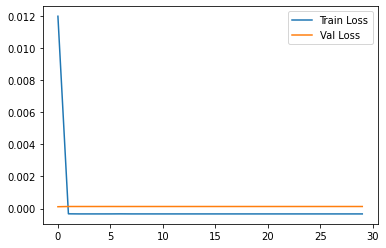

In [113]:
plt.plot(history.history["loss"], label = "Train Loss")
plt.plot(history.history["val_loss"], label = "Val Loss")
plt.legend()
plt.show()

In [118]:
vae_X_val= variational_encoder.predict(X_val)
vae_X_val

[array([[ 0.00048668, -0.00048954, -0.00048836, ..., -0.00048979,
          0.00048671, -0.00048542],
        [ 0.00048246, -0.00048575, -0.00048398, ..., -0.0004855 ,
          0.00048242, -0.00048094],
        [ 0.0004863 , -0.00048929, -0.00048804, ..., -0.00048964,
          0.00048622, -0.00048493],
        ...,
        [ 0.00048166, -0.00048513, -0.00048348, ..., -0.00048496,
          0.00048167, -0.0004801 ],
        [ 0.00048202, -0.00048544, -0.0004837 , ..., -0.00048516,
          0.00048201, -0.00048048],
        [ 0.00048532, -0.00048808, -0.00048653, ..., -0.00048809,
          0.00048505, -0.00048392]], dtype=float32),
 array([[0.00047603, 0.00047397, 0.00047479, ..., 0.00047823, 0.00048211,
         0.00047088],
        [0.00046581, 0.00046174, 0.00046343, ..., 0.00046749, 0.00047148,
         0.00045989],
        [0.00047498, 0.00047273, 0.00047393, ..., 0.00047759, 0.0004817 ,
         0.00046964],
        ...,
        [0.000464  , 0.00046064, 0.0004616 , ..., 0.00046

# **3. GAN**

In [ ]:
# graph hyperparameters
g_learning_rate = 0.00001
d_learning_rate = 0.01
n_x = 100  # number of pixels in the MNIST image 

# number of hidden layers for generator and discriminator
g_n_layers = 3
d_n_layers = 1
# neurons in each hidden layer
g_n_neurons = [256, 512, 1024]
d_n_neurons = [256]

# define parameter ditionary
d_params = {}
g_params = {}

activation = tf.nn.leaky_relu
w_initializer = tf.glorot_uniform_initializer
b_initializer = tf.zeros_initializer

In [164]:
X_train, X_test = X_train.reshape([-1, 10, 10, 1]), X_test.reshape([-1, 10, 10, 1])
X_train = X_train.astype(np.float32, copy=False)
X_test = X_test.astype(np.float32, copy=False)

In [ ]:
X_train = X_train.astype("float32") / 255.0
X_val = X_val.astype("float32") / 255.0
X_train = X_train.reshape(-1, 10, 10, 1)
X_val = X_val.reshape(-1, 10, 10, 1)

In [168]:
codings_size = 30

generator = keras.models.Sequential([
                                     keras.layers.Dense(10, activation="selu", input_shape=[codings_size]),
                                     keras.layers.Dense(20, activation="selu"),
                                     keras.layers.Dense(10*10, activation="sigmoid"),
                                     keras.layers.Reshape([10*10])
])

discriminator = keras.models.Sequential([
                                         keras.layers.Flatten(input_shape=[10,10]),
                                         keras.layers.Dense(20, activation="selu"),
                                         keras.layers.Dense(10, activation="selu"),
                                         keras.layers.Dense(1, activation="sigmoid"),
                                         
])

gan=keras.models.Sequential([generator, discriminator])

In [169]:
generator.summary()

Model: "sequential_58"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_142 (Dense)            (None, 10)                310       
_________________________________________________________________
dense_143 (Dense)            (None, 20)                220       
_________________________________________________________________
dense_144 (Dense)            (None, 100)               2100      
_________________________________________________________________
reshape_23 (Reshape)         (None, 100)               0         
Total params: 2,630
Trainable params: 2,630
Non-trainable params: 0
_________________________________________________________________


In [148]:
discriminator.summary()

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_14 (Flatten)         (None, 100)               0         
_________________________________________________________________
dense_83 (Dense)             (None, 20)                2020      
_________________________________________________________________
dense_84 (Dense)             (None, 10)                210       
Total params: 2,230
Trainable params: 0
Non-trainable params: 2,230
_________________________________________________________________


In [200]:
discriminator.compile(loss="binary_crossentropy", optimizer="rmsprop")
discriminator.trainable = False
gan.compile(loss="mse", optimizer="rmsprop", metrics=['accuracy'])

In [201]:
batch_size = 10
dataset=tf.data.Dataset.from_tensor_slices(X_train).shuffle(1000)
dataset = dataset.batch(batch_size, drop_remainder=True).prefetch(1)

In [202]:
def train_gan(gan, dataset, batch_size, codings_size, n_epochs=10):
  generator, discriminator = gan.layers
  for epoch in range(n_epochs):
    for X_batch in dataset:
      noise = tf.random.normal(shape=[batch_size, codings_size])
      generated_images = generator(noise)
      X_fake_and_real = tf.concat([generated_images, X_batch], axis=0)
      y1 = tf.constant([[0.]] * batch_size + [[1.]] * batch_size)
      discriminator.trainable = True
      discriminator.train_on_batch(X_fake_and_real, y1)

      noise=tf.random.normal(shape=[batch_size, codings_size])
      y2 = tf.constant([[1,]]*batch_size)
      discriminator.trainable = False
      gan.train_on_batch(noise, y2)

train_gan(gan, dataset, batch_size, codings_size)

InvalidArgumentError: ignored